In [331]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut , GeocoderUnavailable , GeocoderInsufficientPrivileges
from sklearn.linear_model import LinearRegression
import time
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm




In [332]:
df = pd.read_csv('Initial_Breakdown_Plan.xlsx - Dataset.csv')

In [333]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Boomw\AppData\Local\Temp\ipykernel_8124\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [334]:
def get_coordinates(cities, country="UK"):
    geolocator = Nominatim(user_agent="geoapiExercises" , timeout=10)
    coordinates = {}

    for city in cities:
        city_query = f"{city}, {country}"
        try:
            location = geolocator.geocode(city_query)
            if location:
                coordinates[city] = (location.latitude, location.longitude)
            else:
                print(f"Could not get the location for {city}")
        except (GeocoderTimedOut, GeocoderInsufficientPrivileges) as e:
            print(f"Error: {e} for {city}")

    return coordinates



C:\Users\Boomw\AppData\Local\Temp\ipykernel_8124\3808974179.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


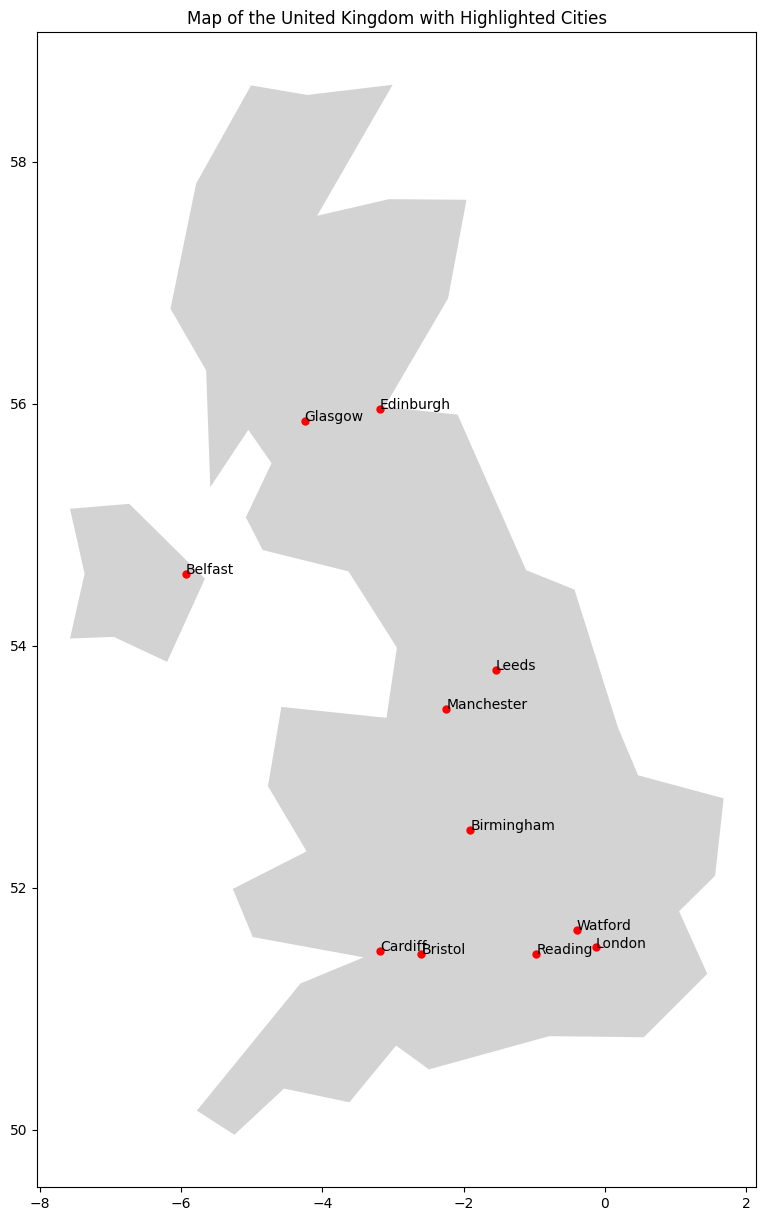

In [335]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in Natural Earth dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to only include the United Kingdom
uk = world[world['name'] == 'United Kingdom']

# Define the cities and their coordinates
cities = {'London': (51.5074456, -0.1277653),
 'Belfast': (54.596391, -5.9301829),
 'Reading': (51.4564242, -0.9700664),
 'Birmingham': (52.4796992, -1.9026911),
 'Leeds': (53.7974185, -1.5437941),
 'Bristol': (51.4538022, -2.5972985),
 'Manchester': (53.4794892, -2.2451148),
 'Watford': (51.6553875, -0.3957425),
 'Edinburgh': (55.9533456, -3.1883749),
 'Glasgow': (55.861155, -4.2501687),
 'Cardiff': (51.4816546, -3.1791934)}

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the size as you like

# Plot the map of the United Kingdom
uk.plot(ax=ax, color='lightgray')

# Plot each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5)
    ax.text(lon, lat, city, fontsize=10)

plt.title('Map of the United Kingdom with Highlighted Cities')
plt.show()


In [336]:
# Getting the amount of items purchased in each area
london = df[df['Location'] == 'London']
belfast = df[df['Location'] == 'Belfast']
reading = df[df['Location'] == 'Reading']
birmingham = df[df['Location'] == 'Birmingham']
leeds = df[df['Location'] == 'Leeds']
bristol = df[df['Location'] == 'Bristol']
manchester = df[df['Location'] == 'Manchester']
watford = df[df['Location'] == 'Watford']
edinburgh = df[df['Location'] == 'Edinburgh']
glasgow  = df[df['Location'] == 'Glasgow']
cardiff  = df[df['Location'] == 'Cardiff']

In [337]:
len_of_city_array = [len(london) , len(belfast) , len(reading),
                         len(birmingham) , len(leeds) , len(bristol),
                         len(manchester) , len(watford) , len(edinburgh),
                         len(glasgow) , len(cardiff)]

cities = ['London', 'Belfast' , 'Reading' , 'Birmingham' , 'Leeds' , 'Bristol' , 'Manchester' , 'Watford' , 'Edinburgh' , 'Glasgow' , 'Cardiff']

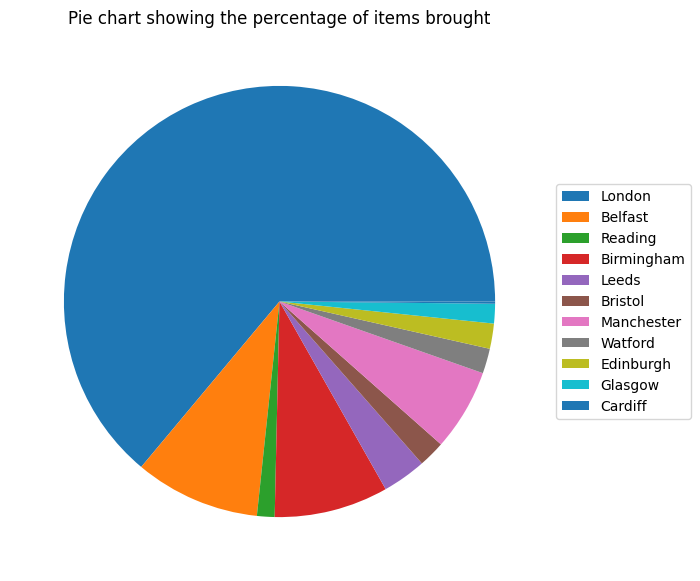

In [338]:
plt.figure(figsize=(14, 7))
plt.pie(len_of_city_array)
plt.legend(cities, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pie chart showing the percentage of items brought')
plt.show()


In [339]:
london_avg_money_spent = np.mean(london['Cost'])
belfast_avg_money_spent = np.mean(belfast['Cost'])
reading_avg_money_spent = np.mean(reading['Cost'])
birmingham_avg_money_spent = np.mean(birmingham['Cost'])
leeds_avg_money_spent = np.mean(leeds['Cost'])
bristol_avg_money_spent = np.mean(bristol['Cost'])
manchester_avg_money_spent = np.mean(manchester['Cost'])
watford_avg_money_spent = np.mean(watford['Cost'])
edinburgh_avg_money_spent = np.mean(edinburgh['Cost'])
glasgow_avg_money_spent = np.mean(glasgow['Cost'])
cardiff_avg_money_spent = np.mean(cardiff['Cost'])


In [340]:
london_Item_Desc = london['Item Desc']
belfast_Item_Desc = belfast['Item Desc']
reading_Item_Desc = reading['Item Desc']
birmingham_Item_Desc = birmingham['Item Desc']
leeds_Item_Desc = leeds['Item Desc']
bristol_Item_Desc = bristol['Item Desc']
manchester_Item_Desc = manchester['Item Desc']
watford_Item_Desc = watford['Item Desc']
edinburgh_Item_Desc = edinburgh['Item Desc']
glasgow_Item_Desc = glasgow ['Item Desc']
cardiff_Item_Desc = cardiff ['Item Desc']

In [341]:
london_Cost_Center = london['Cost Center Level 5']
belfast_Cost_Center = belfast['Cost Center Level 5']
reading_Cost_Center = reading['Cost Center Level 5']
birmingham_Cost_Center = birmingham['Cost Center Level 5']
leeds_Cost_Center = leeds['Cost Center Level 5']
bristol_Cost_Center = bristol['Cost Center Level 5']
manchester_Cost_Center = manchester['Cost Center Level 5']
watford_Cost_Center = watford['Cost Center Level 5']
edinburgh_Cost_Center = edinburgh['Cost Center Level 5']
glasgow_Cost_Center = glasgow['Cost Center Level 5']  
cardiff_Cost_Center = cardiff['Cost Center Level 5']   


In [342]:
Item_Desc_array = [london_Item_Desc,
belfast_Item_Desc,
reading_Item_Desc,
birmingham_Item_Desc,
leeds_Item_Desc,
bristol_Item_Desc,
manchester_Item_Desc,
watford_Item_Desc,
edinburgh_Item_Desc,
glasgow_Item_Desc,
cardiff_Item_Desc]

In [343]:
cost_center_array = [len(london_Cost_Center),
belfast_Cost_Center,
reading_Cost_Center,
birmingham_Cost_Center,
leeds_Cost_Center,
bristol_Cost_Center,
manchester_Cost_Center,
watford_Cost_Center,
edinburgh_Cost_Center,
glasgow_Cost_Center, 
cardiff_Cost_Center]

In [344]:
avg_money_spent_array = [london_avg_money_spent , belfast_avg_money_spent , reading_avg_money_spent , birmingham_avg_money_spent,
                         leeds_avg_money_spent , bristol_avg_money_spent , manchester_avg_money_spent , watford_avg_money_spent,
                        edinburgh_avg_money_spent , glasgow_avg_money_spent , cardiff_avg_money_spent]

<BarContainer object of 11 artists>

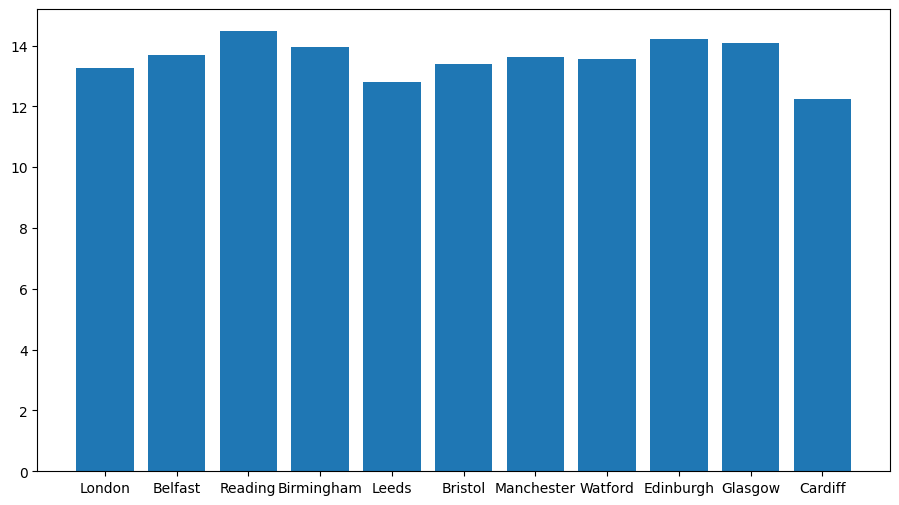

In [345]:
plt.figure(figsize=(11, 6))
plt.bar(cities , avg_money_spent_array)

In [346]:
df_machine = df['Machine']
unique_machine = df_machine.unique()

In [347]:
# Arrays to hold the separated values
london_belfast_city = [place for place in unique_machine if place.startswith("London") or place.startswith("Belfast")]
other_city = [place for place in unique_machine if not (place.startswith("London") or place.startswith("Belfast"))]


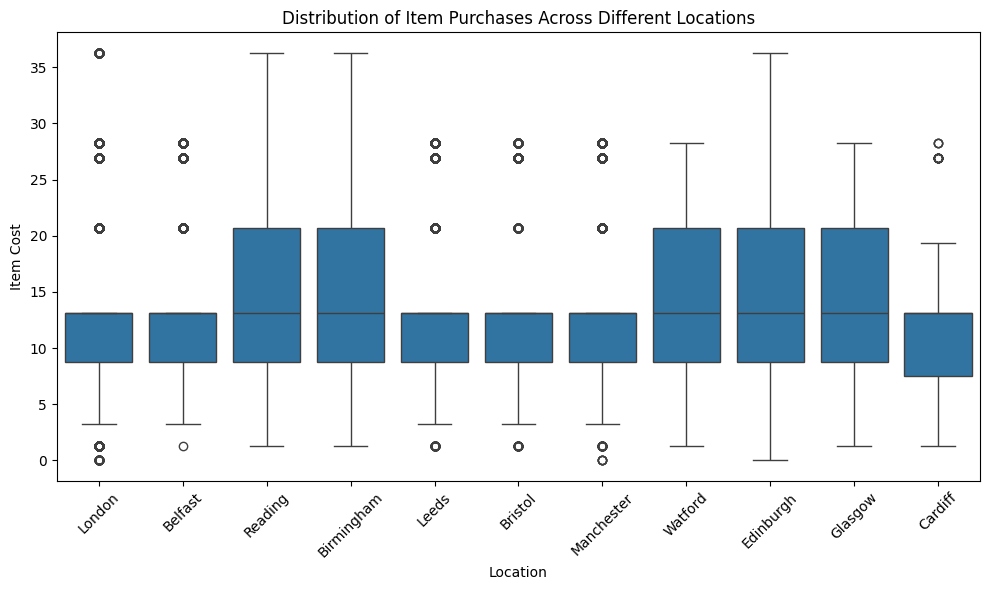

In [348]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Doing the sairma model

In [349]:
import pandas as pd

def items_per_week(df):
    # Convert 'Date' to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert the dates to weekly periods
    df['Week_Period'] = df['Date'].dt.to_period('W')

    # Now you can group by 'Week_Period'
    weekly_groups = df.groupby('Week_Period')

    # Perform some operations within each group, for example, counting the rows per week
    weekly_counts = weekly_groups.size().reset_index(name='Counts')

    # Convert the 'Week_Period' to the start date of each week
    weekly_counts['Week_Start_Date'] = weekly_counts['Week_Period'].dt.start_time

    # If you want 'Week_Start_Date' to be the first column
    weekly_counts = weekly_counts[['Week_Start_Date', 'Counts']]

    return weekly_counts


In [ ]:
items_per_week_london = items_per_week(london)

In [351]:
def get_fuller(location):
    adf_result = adfuller(location.groupby('Day').size())

    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))


In [359]:
def draw_time_graph(df):
    # Drop the first week if necessary
    df = df.iloc[1:]
    
    
    # Now plot the 'items_brought' Series
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['Week_Start_Date'] , df['Counts'])  # Plot the data
    
    # Customizing the plot
    plt.title('Time Series')
    plt.xlabel('Date')
    plt.ylabel('Items Purchased')
    plt.legend()

    # Rotate date labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Set the y-axis to start from the minimum value of 'Items Purchased' or any other desired value


In [ ]:
draw_time_graph(items_per_week_london)

In [363]:
def adfuller_test(items_purchased):
    result=adfuller(items_purchased)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [366]:
adfuller_test(items_per_week_london['Counts'])

ADF Test Statistic : -4.953424514190323
p-value : 2.7418666776881197e-05
#Lags Used : 0
Number of Observations Used : 52
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#This needs to be done manually
items_per_week_london['Seasonal Difference'] = items_per_week_london['Count'] - items_per_week_london['Count'].shift(2)

In [ ]:
adfuller_test(items_per_week_london['Seasonal Difference'].dropna())

ADF Test Statistic : -3.427130666256595
p-value : 0.01006803506101191
#Lags Used : 7
Number of Observations Used : 43
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
def plot_acf_pacf(seasonal_difference , no_of_na):
    fig = plt.figure(figsize=(12,8))

    nlags = min(40, len(seasonal_difference.iloc[(no_of_na+1):]) // 2 - 1)

    # Assuming 'df' is your DataFrame and 'Seasonal First Difference' is a column in your DataFrame
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax1)

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax2)

    plt.show()


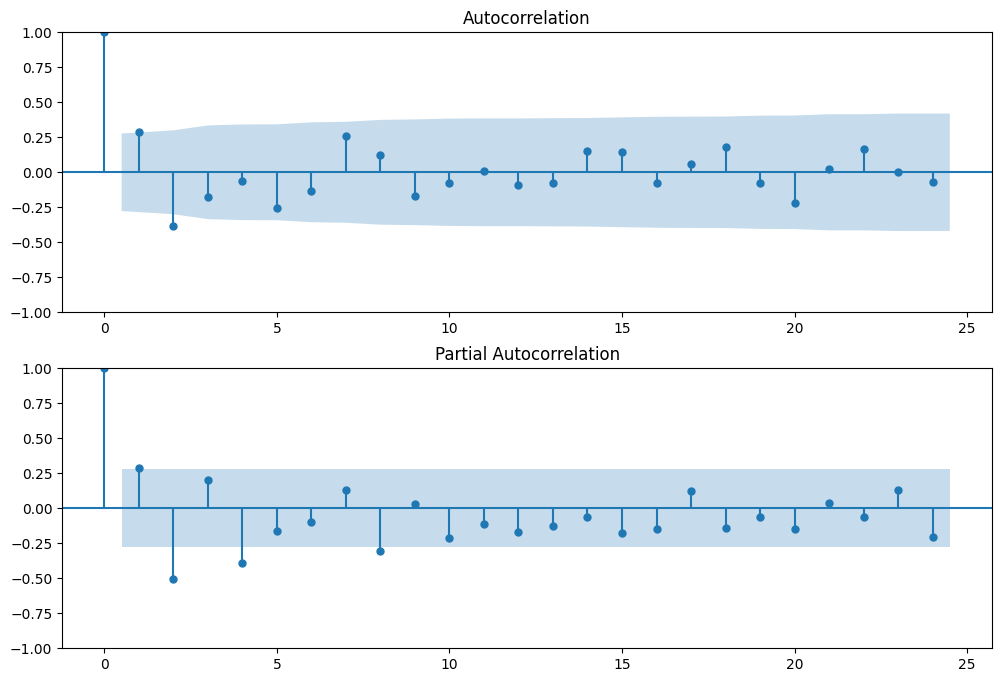

In [ ]:
plot_acf_pacf(items_per_week_london['Seasonal Difference'] , 2)

In [ ]:
london_model=sm.tsa.statespace.SARIMAX(items_per_week_london['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,2))
london_results=london_model.fit()

c:\Users\Boomw\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

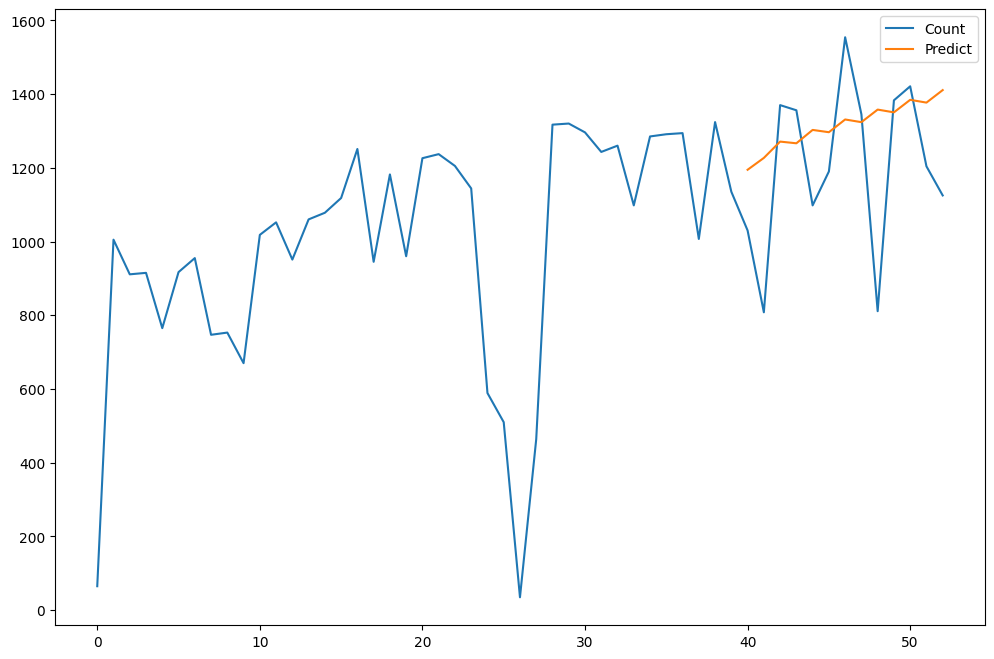

In [ ]:
items_per_week_london['Predict']=london_results.predict(start=40,end=52,dynamic=True)
items_per_week_london[['Count','Predict']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
import pandas as pd

# Ensure 'last_date' is converted to a pandas Timestamp
last_date = pd.to_datetime(items_per_week_london.index[-1])
future_london_dates = [last_date + DateOffset(weeks=x) for x in range(4)]

C:\Users\Boomw\AppData\Local\Temp\ipykernel_8124\793740050.py:6: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_london_dates = [last_date + DateOffset(weeks=x) for x in range(4)]


In [ ]:
future_london_datest_df=pd.DataFrame(index=future_london_dates[1:],columns=df.columns)

In [ ]:
future_london_datest_df.tail()

,RecordID,Item Desc,Item Group,Cost,Date,FY,Cost Center Level 5,Cost Center Level 4,Management Level,Machine,Location,No of same item bought,Item Group2,Week,Day,HHMM
1970-01-08 00:00:00.000000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-15 00:00:00.000000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-22 00:00:00.000000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_london_df=pd.concat([df,future_london_datest_df])

C:\Users\Boomw\AppData\Local\Temp\ipykernel_8124\1138934968.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_london_df=pd.concat([df,future_london_datest_df])


c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

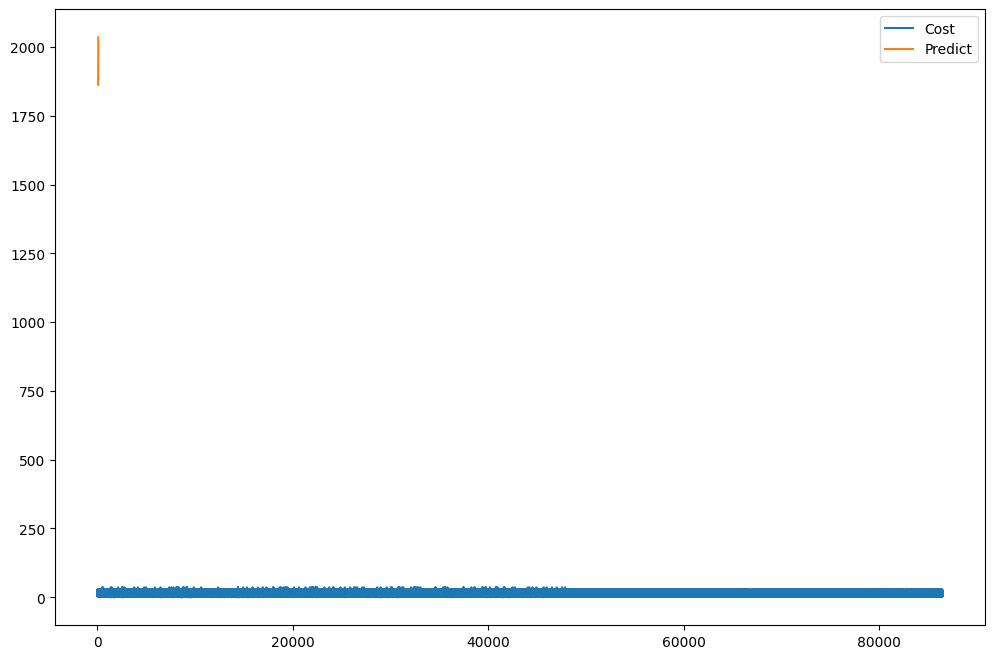

In [ ]:
future_london_df['Predict'] = london_results.predict(start = 104, end = 120, dynamic= True)  
future_london_df[['Cost', 'Predict']].plot(figsize=(12, 8)) 